## Creation of demo model (tori model)

### A model identical to this can be rapidly created via the Acto3D menu bar: File > Demo Model.

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
imgsize = 500

radius1 = 150 # major radius
radius2 = 30 # minor radius

linewidth = 5

edge_value = 240
inside_value = 0
outside_value = 120

In [4]:
def create_mask(radius1, radius2, z):
    mask = np.full((imgsize, imgsize), 80, dtype=np.uint8)  
    
    center_x, center_y = imgsize // 2, imgsize // 2

    for y in range(imgsize):
        for x in range(imgsize):
            # 
            left1 = (np.sqrt((x - center_x) ** 2 + (z) ** 2) - radius1) ** 2 + (y - center_y) ** 2
            left2 = (np.sqrt((y - center_y) ** 2 + (z) ** 2) - radius1) ** 2 + (x - center_x) ** 2
            right = radius2 ** 2
                
            if left1 <= right or left2 <= right:
                mask[y, x] = inside_value
            elif left1 <= (radius2 + linewidth) ** 2 or left2 <= (radius2 + linewidth) ** 2:
                mask[y, x] = edge_value
            else:
                mask[y, x] = outside_value
                

    return mask

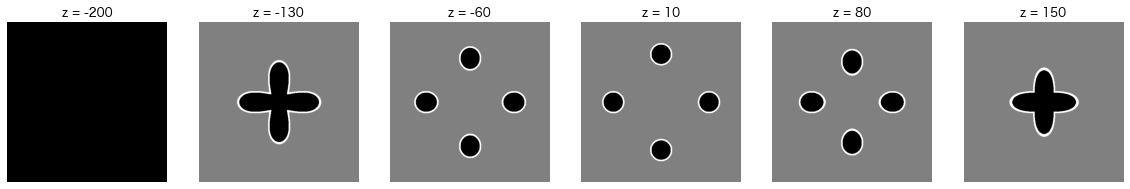

In [5]:
z_values = range(-200, 200 + 1, 70)  
section_masks = [create_mask(radius1, radius2, z) for z in z_values]

# Display the masks
fig, axes = plt.subplots(1, len(section_masks), figsize=(20, 20))
for ax, mask, z_value in zip(axes, section_masks, z_values):
    ax.imshow(mask, cmap='gray')
    ax.axis('off')
    ax.set_title(f"z = {z_value}")
plt.show()

In [6]:
import os
from tqdm import tqdm

os.makedirs('./output_tolus', exist_ok=True)
os.makedirs('./output_tolus_blur', exist_ok=True)

z_values = range(-radius1 - radius2 - 20, radius1 + radius2 + 21, 1) 

for index, z_value in enumerate(tqdm(z_values, desc="Generating tori section")):
    mask = create_mask(radius1, radius2, z_value)
    
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(mask, (7, 7), 0)
    
    cv2.imwrite(f'./output_tolus/z{str(index).zfill(4)}.tif', mask)
    cv2.imwrite(f'./output_tolus_blur/z{str(index).zfill(4)}.tif', blurred_image)

Generating tori section: 100%|██████████| 401/401 [06:14<00:00,  1.07it/s]


### Calculate the volume of the tori (calculate total black pixels in NOT blured image)

In [9]:
def count_pixels_in_images(folder_path, value):
    """
    Count the total number of specific pixels in all images in the specified folder.
    """
    
    total_pixels = 0
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.tif')]

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Count pi      xels for the value
        pixels = np.sum(image == value)
        total_pixels += pixels

    return total_pixels


In [10]:

# Path to the folder containing the images
folder_path = './output_tolus/'

# Count the black pixels in the images
total_black_pixels = count_pixels_in_images(folder_path, 0)
total_black_pixels

5029686